<a href="https://colab.research.google.com/github/luisovillista/Proyecto_Integrador/blob/main/Proyecto_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install plotly ipywidgets


In [33]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix



# Configuraciones de estilo para las gráficas
sns.set(style="whitegrid")

# Cargar la base de datos
file_path = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cx,Rango Edad
0,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,N,23-30
1,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight,N,23-30
2,Male,23.0,1.77,60.0,yes,yes,3.0,1.0,Sometimes,no,1.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight,N,23-30
3,Female,23.0,1.65,70.0,yes,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I,N,23-30
4,Female,23.0,1.60,52.0,no,yes,2.0,4.0,Frequently,no,2.0,no,2.0,1.0,Sometimes,Automobile,Normal_Weight,N,23-30


In [34]:
# Convertir variables categóricas a variables dummy
data = pd.get_dummies(data, drop_first=True)

# Crear una nueva columna para el género con etiquetas 'Hombre' y 'Mujer'
data['Gender'] = data['Gender_Male'].apply(lambda x: 'Hombre' if x else 'Mujer')

# Mostrar los nombres de las columnas después de la limpieza
print("Nombres de las columnas:")
print(data.columns)


Nombres de las columnas:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II',
       'Cx_Y', 'Rango Edad_31-40', 'Rango Edad_40 en Adelante', 'Gender'],
      dtype='object')


In [35]:
# Calcular IMC
IMC = data['BMI'] = data['Weight'] / (data['Height'] ** 2)
IMC

0       23.765432
1       24.444444
2       19.151585
3       25.711662
4       20.312500
          ...    
1000    28.711857
1001    29.490883
1002    25.713513
1003    28.089011
1004    24.242424
Length: 1005, dtype: float64

Exploración Inicial de la Base de Datos

La base de datos contiene las siguientes columnas relevantes:

1. Gender: Género del paciente.
2. Age: Edad del paciente.
3. Height: Altura del paciente.
4. Weight: Peso del paciente.
5. family_history_with_overweight: Historial familiar de sobrepeso.
6. FAVC: Frecuencia de consumo de alimentos hipercalóricos.
7. FCVC: Consumo de vegetales crudos.
8. NCP: Número de comidas principales al día.
9. CAEC: Frecuencia de consumo de alimentos entre comidas.
10. SMOKE: Tabaquismo.
11. CH2O: Consumo de agua (litros por día).
12. SCC: Seguimiento del consumo de calorías.
13. FAF: Frecuencia de actividad física.
14. TUE: Tiempo de uso de dispositivos electrónicos.
15. CALC: Frecuencia de consumo de alcohol.
16. MTRANS: Medio de transporte habitual.
17. NObeyesdad: Nivel de obesidad.
18. Cx: Estado de candidato a cirugía (asumido como una columna existente).
19. Rango Edad: Rango de edad



---



2. Análisis Descriptivo

Resumen Estadístico de las Variables Numéricas


In [36]:
# Resumen estadístico
summary_stats = data.describe()
summary_stats


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,32.112116,1.702708,94.553718,2.453541,2.692329,2.005938,0.818105,0.517290,32.532238
std,8.758580,0.091857,20.346410,0.504443,0.682073,0.611939,0.803058,0.571120,6.283484
min,23.000000,1.480000,42.993937,1.000000,1.000000,1.000000,0.000000,0.000000,16.823683
25%,25.000000,1.632193,80.000000,2.000000,2.749334,1.530493,0.000096,0.000000,27.638861
50%,30.000000,1.700000,98.661760,2.444599,3.000000,2.000000,0.759422,0.360986,32.864050
75%,37.496175,1.770000,111.884535,3.000000,3.000000,2.514872,1.309304,0.923082,37.574649
max,61.000000,1.930000,133.485478,3.000000,4.000000,3.000000,3.000000,2.000000,44.144338




---



Distribución de IMC y Edad
Se analizarán las distribuciones de IMC y edad para identificar patrones relevantes.

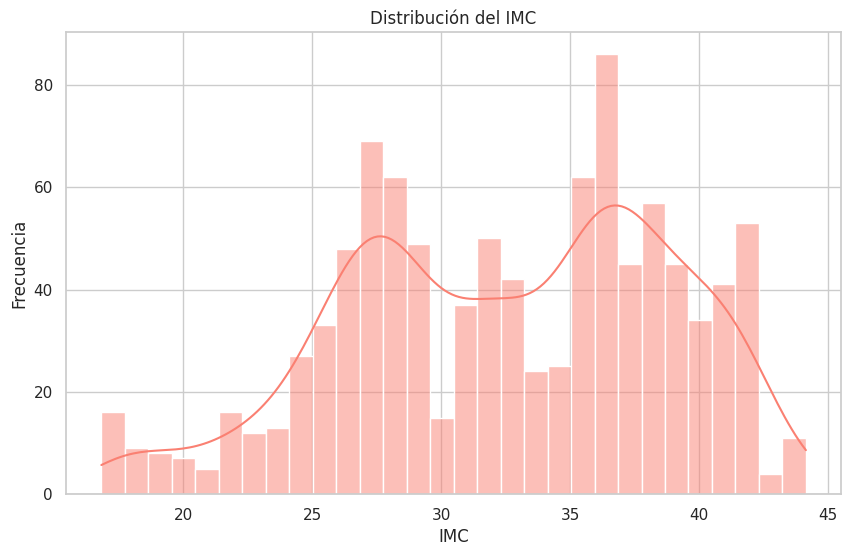

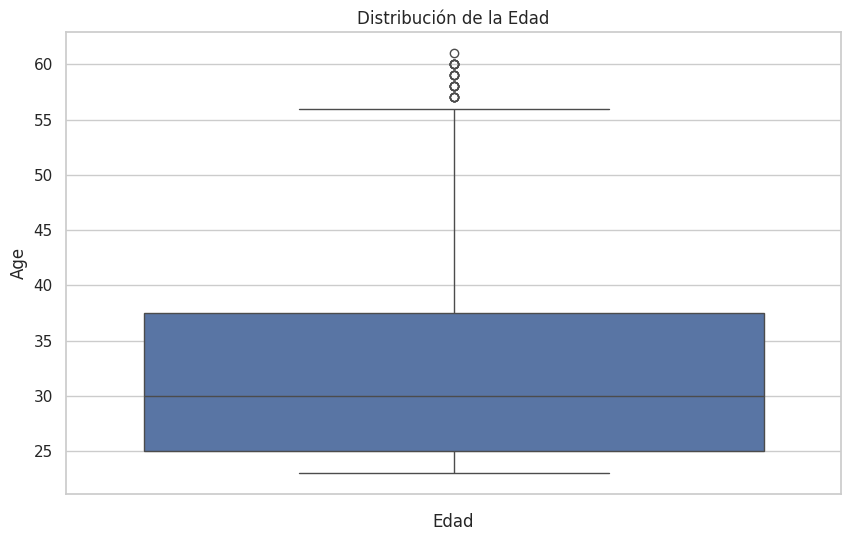

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular IMC
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Histograma del IMC
plt.figure(figsize=(10, 6))
sns.histplot(data['BMI'], kde=True, bins=30, color='salmon')
plt.title('Distribución del IMC')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de la edad
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Age'])
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.show()




---



Correlaciones entre Variables

Evaluamos las correlaciones entre las variables numéricas para identificar relaciones significativas.

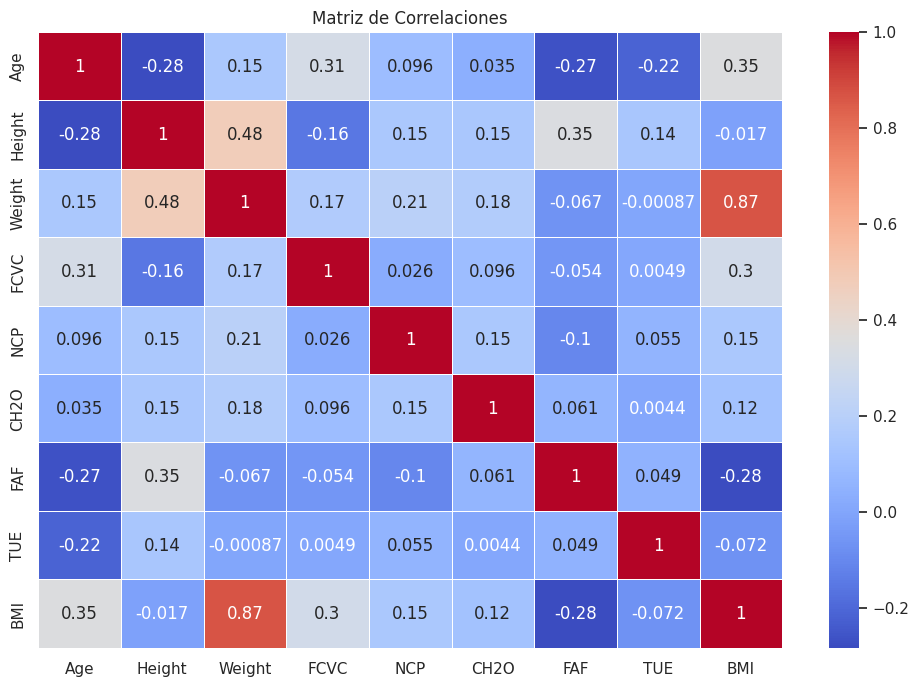

In [38]:
# Calcular IMC
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Seleccionar solo las columnas numéricas relevantes
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Crear la matriz de correlaciones
correlation_matrix = data[numeric_columns].corr()

# Visualizar la matriz de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

Resultados del Análisis Descriptivo


Resumen Estadístico

El resumen estadístico de las principales variables numéricas es el siguiente:


1. Edad: La edad de los pacientes oscila entre 23 y 61 años, con una media de aproximadamente 32 años.

2. Altura: La altura promedio es de 1.70 metros, con un rango que va desde 1.48 hasta 1.93 metros.

3. Peso: El peso promedio es de 94.55 kg, con una desviación estándar de 20.35 kg. El peso mínimo registrado es de 42.99 kg y el máximo de 133.48 kg.

4. FCVC (Consumo de vegetales crudos): La mayoría de los pacientes tienen un consumo de vegetales crudos moderado a alto.

5. NCP (Número de comidas principales al día): La mayoría de los pacientes consumen entre 2 y 3 comidas principales al día.

6. CH2O (Consumo de agua): El consumo promedio de agua es de aproximadamente 2 litros por día.

7. FAF (Frecuencia de actividad física): La frecuencia de actividad física varía ampliamente, con una media de 0.82.

8. TUE (Tiempo de uso de dispositivos electrónicos): El tiempo promedio de uso de dispositivos electrónicos es de aproximadamente 0.52 horas diarias.


Distribuciones

1. Distribución del IMC: La mayoría de los pacientes tienen un IMC que oscila entre 20 y 40, con una distribución que sugiere un número significativo de pacientes con sobrepeso u obesidad.

2. Distribución de la Edad: La mayoría de los pacientes están en el rango de 25 a 40 años, con algunos casos en los extremos (menores de 25 y mayores de 60).
Correlaciones entre Variables


La matriz de correlaciones muestra las siguientes relaciones significativas:


1. Peso y Altura: Existe una correlación positiva moderada entre peso y altura.

2. IMC y Peso: Como era de esperarse, hay una alta correlación positiva entre IMC y peso.

3. Edad y CH2O: Existe una ligera correlación negativa entre edad y consumo de agua.

4. Interpretación y Siguientes Pasos



Parámetros Relevantes para Candidatura a Cirugía Bariátrica:


1. IMC: Los pacientes con un IMC mayor a 40, o entre 35 y 39.9 con comorbilidades, son potenciales candidatos.

2. Edad: Adultos, principalmente en el rango de 25 a 40 años.

3. Comorbilidades: Variables relacionadas con condiciones médicas como hipertensión, diabetes, etc., deben ser consideradas.

4. Estilo de Vida: Hábitos alimenticios, actividad física y otros factores relacionados con la salud y el estilo de vida.


Preparación para el Análisis Predictivo:


1. Seleccionar características relevantes como edad, IMC, historial médico, y factores de estilo de vida.

2. Limpiar y preparar los datos para el modelado predictivo.

3. Evaluar modelos de aprendizaje supervisado para predecir la idoneidad para la cirugía bariátrica.



---



In [39]:
# Resumen estadístico de variables relacionadas con comorbilidades
comorbidity_columns = ['family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SCC_yes', 'FAF', 'CALC_Sometimes', 'CALC_no']
comorbidity_stats = data[comorbidity_columns].describe()
print(comorbidity_stats)



               FAF
count  1005.000000
mean      0.818105
std       0.803058
min       0.000000
25%       0.000096
50%       0.759422
75%       1.309304
max       3.000000


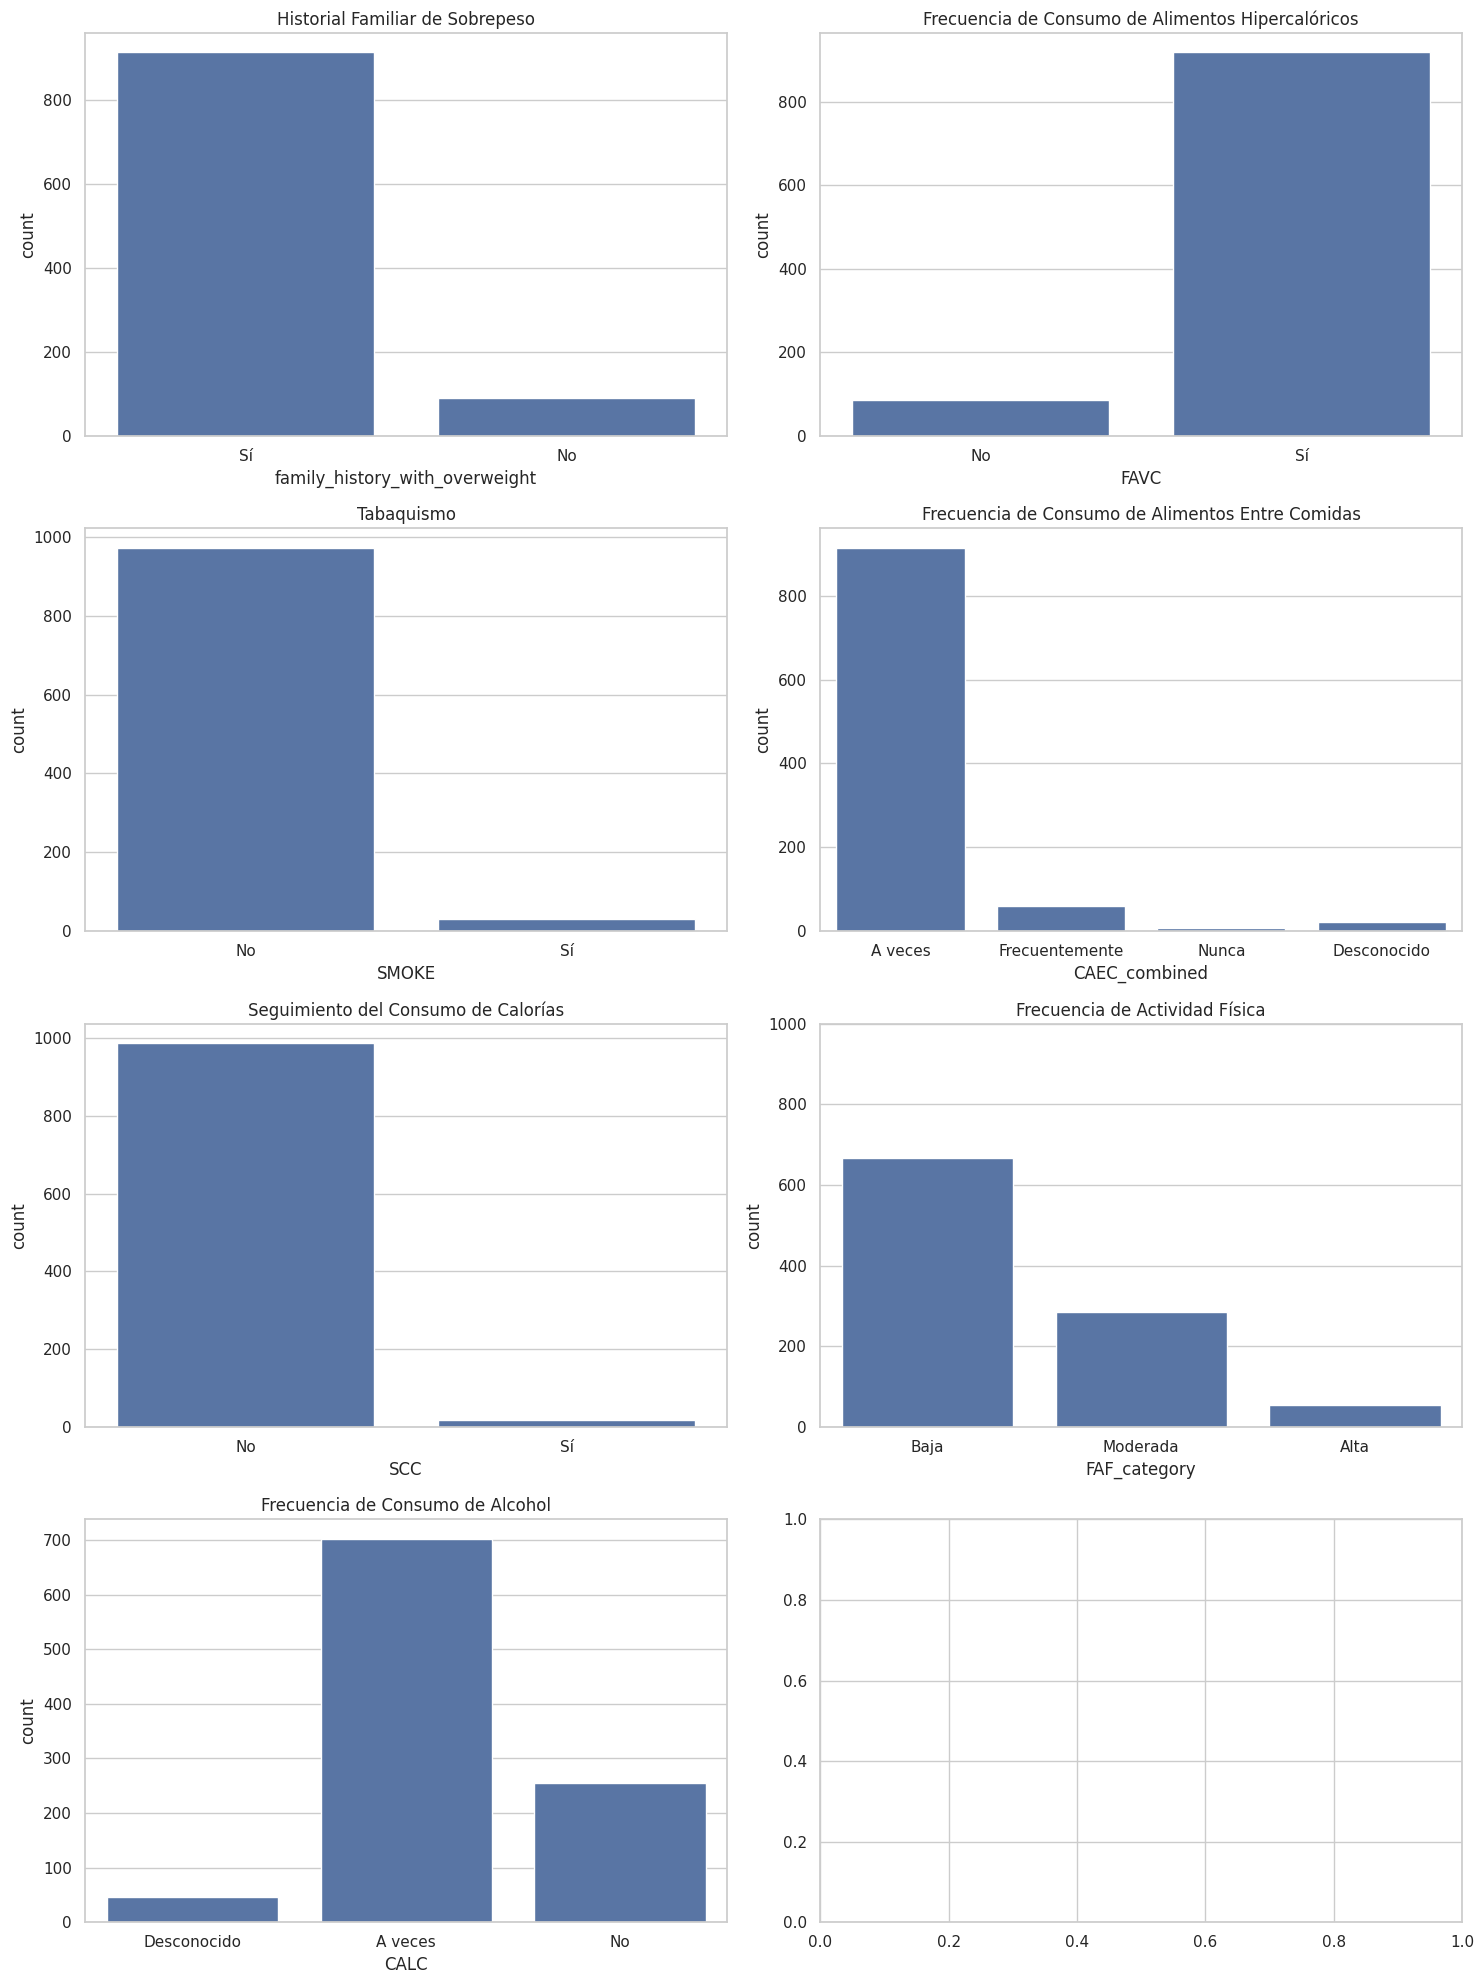

In [40]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular IMC
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Convertir valores booleanos a valores más interpretables
data['family_history_with_overweight'] = data['family_history_with_overweight_yes'].apply(lambda x: 'Sí' if x == 1 else 'No')
data['FAVC'] = data['FAVC_yes'].apply(lambda x: 'Sí' if x == 1 else 'No')
data['SCC'] = data['SCC_yes'].apply(lambda x: 'Sí' if x == 1 else 'No')
data['SMOKE'] = data['SMOKE_yes'].apply(lambda x: 'Sí' if x == 1 else 'No')
data['CALC'] = data.apply(lambda row: 'A veces' if row['CALC_Sometimes'] == 1 else ('No' if row['CALC_no'] == 1 else 'Desconocido'), axis=1)

# Combinar las columnas de CAEC en una sola columna categórica
def combine_caec(row):
    if row['CAEC_Frequently'] == 1:
        return 'Frecuentemente'
    elif row['CAEC_Sometimes'] == 1:
        return 'A veces'
    elif row['CAEC_no'] == 1:
        return 'Nunca'
    else:
        return 'Desconocido'

data['CAEC_combined'] = data.apply(combine_caec, axis=1)

# Transformar los valores de FAF en categorías
data['FAF_category'] = pd.cut(data['FAF'], bins=[0, 1, 2, 3], labels=['Baja', 'Moderada', 'Alta'], include_lowest=True)


# Distribuciones de variables relacionadas con comorbilidades
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Historial familiar de sobrepeso
sns.countplot(x='family_history_with_overweight', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Historial Familiar de Sobrepeso')

# Frecuencia de consumo de alimentos hipercalóricos
sns.countplot(x='FAVC', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Frecuencia de Consumo de Alimentos Hipercalóricos')

# Tabaquismo
sns.countplot(x='SMOKE', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Tabaquismo')

# Frecuencia de consumo de alimentos entre comidas
sns.countplot(x='CAEC_combined', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Frecuencia de Consumo de Alimentos Entre Comidas')

# Seguimiento del consumo de calorías
sns.countplot(x='SCC', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Seguimiento del Consumo de Calorías')

# Frecuencia de actividad física (categorías)
sns.countplot(x='FAF_category', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Frecuencia de Actividad Física')
axes[2, 1].set_ylim(0, 1000)  # Ajustar el límite superior del eje y para una mejor visualización

# Frecuencia de consumo de alcohol
sns.countplot(x='CALC', data=data, ax=axes[3, 0])
axes[3, 0].set_title('Frecuencia de Consumo de Alcohol')

plt.tight_layout()
plt.show()


Resultados del Análisis de Comorbilidades

Resumen Estadístico

El resumen estadístico de las variables relacionadas con comorbilidades es el siguiente:



1. FAF (Frecuencia de actividad física): La media de la frecuencia de actividad física es de 0.82, con un mínimo de 0 y un máximo de 3. La mayoría de los pacientes tienen una actividad física baja a moderada.

Distribuciones de Variables Relacionadas con Comorbilidades

1. Historial Familiar de Sobrepeso:


La mayoría de los pacientes tienen un historial familiar de sobrepeso, lo cual es un factor de riesgo significativo para la obesidad.

2. Frecuencia de Consumo de Alimentos Hipercalóricos (FAVC):


Una proporción significativa de pacientes consume alimentos hipercalóricos frecuentemente, lo cual puede contribuir al aumento de peso y las comorbilidades.

3. Tabaquismo (SMOKE):


La mayoría de los pacientes no fuman, pero una minoría significativa sí lo hace, lo cual es un factor de riesgo adicional para enfermedades crónicas.

4. Frecuencia de Consumo de Alimentos Entre Comidas (CAEC):


Muchos pacientes consumen alimentos entre comidas con cierta frecuencia, lo cual puede estar asociado con hábitos alimenticios poco saludables.

5. Seguimiento del Consumo de Calorías (SCC):


La mayoría de los pacientes no siguen su consumo de calorías, lo cual puede dificultar el control del peso y la gestión de la dieta.

6. Frecuencia de Actividad Física (FAF):


La actividad física es generalmente baja entre los pacientes, con una media de 0.82. La baja actividad física es un factor de riesgo significativo para la obesidad y las comorbilidades.

Interpretación

Las comorbilidades y factores de riesgo analizados muestran patrones que son consistentes con una población que podría beneficiarse de intervenciones para la pérdida de peso, incluida la cirugía bariátrica. En particular, el historial familiar de sobrepeso, el consumo frecuente de alimentos hipercalóricos, y la baja frecuencia de actividad física son factores que pueden contribuir significativamente a la obesidad y sus comorbilidades.



---



Análisis Predictivo para Determinar Candidatos Idóneos para Cirugía Bariátrica

Preparación de los Datos y Construcción del Modelo

In [41]:
# Mostrar las columnas del DataFrame
print(data.columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II',
       'Cx_Y', 'Rango Edad_31-40', 'Rango Edad_40 en Adelante', 'Gender',
       'BMI', 'family_history_with_overweight', 'FAVC', 'SCC', 'SMOKE', 'CALC',
       'CAEC_combined', 'FAF_category'],
      dtype='object')


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np

# Crear una nueva columna binaria que indique si la persona es candidata a cirugía
def is_candidate(row):
    if 'Obesity' in row:
        return 1
    else:
        return 0

data['Candidate'] = data['NObeyesdad_Normal_Weight'] + data['NObeyesdad_Obesity_Type_I'] + data['NObeyesdad_Obesity_Type_II'] + data['NObeyesdad_Obesity_Type_III'] + data['NObeyesdad_Overweight_Level_I'] + data['NObeyesdad_Overweight_Level_II']
data['Candidate'] = data['Candidate'].apply(lambda x: 1 if x > 0 else 0)

# Selección de características
features = ['Age', 'Gender', 'BMI', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC_combined', 'SCC', 'FAF', 'CALC']
data['Gender'] = data['Gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

X = data[features]
y = data['Candidate']

# Codificación de variables categóricas
X = pd.get_dummies(X, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC_combined', 'SCC', 'CALC'], drop_first=True)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicciones y Evaluación
y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Resultados de Regresión Logística
logreg_report = classification_report(y_test, y_pred_logreg)
logreg_roc_auc = roc_auc_score(y_test, y_prob_logreg)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)

# Modelo de Árbol de Decisión
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predicciones y Evaluación
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# Resultados de Árbol de Decisión
tree_report = classification_report(y_test, y_pred_tree)
tree_roc_auc = roc_auc_score(y_test, y_prob_tree)
tree_cm = confusion_matrix(y_test, y_pred_tree)

(logreg_report, logreg_roc_auc, logreg_cm, tree_report, tree_roc_auc, tree_cm)


('              precision    recall  f1-score   support\n\n           0       0.75      0.60      0.67         5\n           1       0.99      0.99      0.99       196\n\n    accuracy                           0.99       201\n   macro avg       0.87      0.80      0.83       201\nweighted avg       0.98      0.99      0.98       201\n',
 0.9826530612244898,
 array([[  3,   2],
        [  1, 195]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         5\n           1       1.00      1.00      1.00       196\n\n    accuracy                           1.00       201\n   macro avg       1.00      1.00      1.00       201\nweighted avg       1.00      1.00      1.00       201\n',
 1.0,
 array([[  5,   0],
        [  0, 196]]))

Validación Adicional

In [43]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer

# Definir el scoring
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Validación Cruzada para Regresión Logística
logreg_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Optimización de Hiperparámetros para Regresión Logística
logreg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

logreg_grid_search = GridSearchCV(logreg, param_grid=logreg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logreg_grid_search.fit(X_train_scaled, y_train)

# Validación Cruzada para Árbol de Decisión
tree_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
tree_cv_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')

# Optimización de Hiperparámetros para Árbol de Decisión
tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_grid_search = GridSearchCV(tree, param_grid=tree_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search.fit(X_train, y_train)

# Resultados de Grid Search
logreg_best_params = logreg_grid_search.best_params_
logreg_best_score = logreg_grid_search.best_score_

tree_best_params = tree_grid_search.best_params_
tree_best_score = tree_grid_search.best_score_

(logreg_scores.mean(), logreg_cv_scores.mean(), logreg_best_params, logreg_best_score,
 tree_scores.mean(), tree_cv_scores.mean(), tree_best_params, tree_best_score)


(0.9900465838509318,
 0.9941613588110403,
 {'C': 10, 'solver': 'lbfgs'},
 0.9951167728237792,
 0.9975155279503106,
 0.9737301459324357,
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.975)

Validación Adicional de los Modelos

In [44]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Validación Cruzada para Regresión Logística
logreg_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Optimización de Hiperparámetros para Regresión Logística
logreg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

logreg_grid_search = GridSearchCV(logreg, param_grid=logreg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logreg_grid_search.fit(X_train_scaled, y_train)

# Validación Cruzada para Árbol de Decisión
tree_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
tree_cv_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')

# Optimización de Hiperparámetros para Árbol de Decisión
tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_grid_search = GridSearchCV(tree, param_grid=tree_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search.fit(X_train, y_train)

# Resultados de Grid Search
logreg_best_params = logreg_grid_search.best_params_
logreg_best_score = logreg_grid_search.best_score_

tree_best_params = tree_grid_search.best_params_
tree_best_score = tree_grid_search.best_score_

(logreg_scores.mean(), logreg_cv_scores.mean(), logreg_best_params, logreg_best_score,
 tree_scores.mean(), tree_cv_scores.mean(), tree_best_params, tree_best_score)


(0.9900465838509318,
 0.9941613588110403,
 {'C': 10, 'solver': 'lbfgs'},
 0.9951167728237792,
 0.9987577639751553,
 0.9743630573248406,
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.975)

In [45]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Cargar la base de datos desde GitHub
url = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
data = pd.read_csv(url)

# Calcular IMC (BMI)
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Crear una nueva columna binaria que indique si la persona es candidata a cirugía
def is_candidate(row):
    if 'Obesity' in row:
        return 1
    else:
        return 0

data['Candidate'] = data['NObeyesdad'].apply(is_candidate)

# Selección de características
features = ['Age', 'Gender', 'BMI', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'FAF', 'CALC']
data['Gender'] = data['Gender'].apply(lambda x: 'Male' if x == 'Hombre' else 'Female')

X = data[features]
y = data['Candidate']

# Codificación de variables categóricas
X = pd.get_dummies(X, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC'], drop_first=True)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predicciones y Evaluación
y_pred_logreg = logreg.predict(X_test_scaled)
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Resultados de Regresión Logística
logreg_report = classification_report(y_test, y_pred_logreg)
logreg_roc_auc = roc_auc_score(y_test, y_prob_logreg)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)

# Modelo de Árbol de Decisión
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predicciones y Evaluación
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# Resultados de Árbol de Decisión
tree_report = classification_report(y_test, y_pred_tree)
tree_roc_auc = roc_auc_score(y_test, y_prob_tree)
tree_cm = confusion_matrix(y_test, y_pred_tree)

# Visualización de Resultados

# Matriz de confusión para Regresión Logística
logreg_cm_figure = ff.create_annotated_heatmap(logreg_cm, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'], colorscale='Viridis')
logreg_cm_figure.update_layout(title_text='Confusion Matrix for Logistic Regression', margin=dict(t=50, l=200))
logreg_cm_figure.update_xaxes(title_text='Predicted value')
logreg_cm_figure.update_yaxes(title_text='True value')

# Matriz de confusión para Árbol de Decisión
tree_cm_figure = ff.create_annotated_heatmap(tree_cm, x=['Predicted No', 'Predicted Yes'], y=['Actual No', 'Actual Yes'], colorscale='Viridis')
tree_cm_figure.update_layout(title_text='Confusion Matrix for Decision Tree', margin=dict(t=50, l=200))
tree_cm_figure.update_xaxes(title_text='Predicted value')
tree_cm_figure.update_yaxes(title_text='True value')

# Curva ROC para Regresión Logística
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
logreg_roc_figure = go.Figure()
logreg_roc_figure.add_trace(go.Scatter(x=fpr_logreg, y=tpr_logreg, mode='lines', name='Logistic Regression'))
logreg_roc_figure.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
logreg_roc_figure.update_layout(title='ROC Curve for Logistic Regression', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Curva ROC para Árbol de Decisión
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
tree_roc_figure = go.Figure()
tree_roc_figure.add_trace(go.Scatter(x=fpr_tree, y=tpr_tree, mode='lines', name='Decision Tree'))
tree_roc_figure.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
tree_roc_figure.update_layout(title='ROC Curve for Decision Tree', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Mostrar gráficos
logreg_cm_figure.show()
tree_cm_figure.show()
logreg_roc_figure.show()
tree_roc_figure.show()

# Validación Cruzada y Optimización de Hiperparámetros

# Definir el scoring
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Validación Cruzada para Regresión Logística
logreg_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='roc_auc')

# Optimización de Hiperparámetros para Regresión Logística
logreg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

logreg_grid_search = GridSearchCV(logreg, param_grid=logreg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logreg_grid_search.fit(X_train_scaled, y_train)

# Validación Cruzada para Árbol de Decisión
tree_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')
tree_cv_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')

# Optimización de Hiperparámetros para Árbol de Decisión
tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_grid_search = GridSearchCV(tree, param_grid=tree_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search.fit(X_train, y_train)

# Resultados de Grid Search
logreg_best_params = logreg_grid_search.best_params_
logreg_best_score = logreg_grid_search.best_score_

tree_best_params = tree_grid_search.best_params_
tree_best_score = tree_grid_search.best_score_

# Mostrar resultados de la validación cruzada y optimización de hiperparámetros
print(f"Logistic Regression CV Accuracy: {logreg_scores.mean()}")
print(f"Logistic Regression CV ROC AUC: {logreg_cv_scores.mean()}")
print(f"Best Logistic Regression Params: {logreg_best_params}")
print(f"Best Logistic Regression ROC AUC: {logreg_best_score}")

print(f"Decision Tree CV Accuracy: {tree_scores.mean()}")
print(f"Decision Tree CV ROC AUC: {tree_cv_scores.mean()}")
print(f"Best Decision Tree Params: {tree_best_params}")
print(f"Best Decision Tree ROC AUC: {tree_best_score}")



Logistic Regression CV Accuracy: 0.9850776397515528
Logistic Regression CV ROC AUC: 0.9993467194419072
Best Logistic Regression Params: {'C': 100, 'solver': 'lbfgs'}
Best Logistic Regression ROC AUC: 0.9998685960610867
Decision Tree CV Accuracy: 0.9975155279503106
Decision Tree CV ROC AUC: 0.9973769957640926
Best Decision Tree Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree ROC AUC: 0.9973769957640926


Seleccionar Candidatos Ideales

In [46]:
# Obtener las probabilidades predichas de ambos modelos
y_prob_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# Establecer un umbral de decisión
threshold = 0.9

# Determinar candidatos ideales basados en el umbral para Regresión Logística
ideal_candidates_logreg = X_test[y_prob_logreg >= threshold]
ideal_candidates_logreg['Predicted_Probability'] = y_prob_logreg[y_prob_logreg >= threshold]

# Determinar candidatos ideales basados en el umbral para Árbol de Decisión
ideal_candidates_tree = X_test[y_prob_tree >= threshold]
ideal_candidates_tree['Predicted_Probability'] = y_prob_tree[y_prob_tree >= threshold]

# Mostrar los resultados
print("Candidatos ideales según Regresión Logística:")
print(ideal_candidates_logreg)

print("\nCandidatos ideales según Árbol de Decisión:")
print(ideal_candidates_tree)


Candidatos ideales según Regresión Logística:
           Age        BMI       FAF  family_history_with_overweight_yes  \
682  30.607546  38.401643  1.076248                                True   
514  26.199321  34.067577  1.243567                                True   
365  55.000000  40.128624  0.005939                                True   
655  30.163408  33.187399  0.000000                                True   
656  30.188303  36.256178  0.000000                                True   
..         ...        ...       ...                                 ...   
208  24.244029  37.989488  1.958694                                True   
778  33.000000  33.742423  1.000000                                True   
334  33.000000  37.623670  0.180158                                True   
210  35.000000  41.753588  0.324913                                True   
350  50.000000  37.245859  0.210351                                True   

     FAVC_yes  SMOKE_yes  CAEC_Frequently  CAEC_Somet

Evaluación Adicional

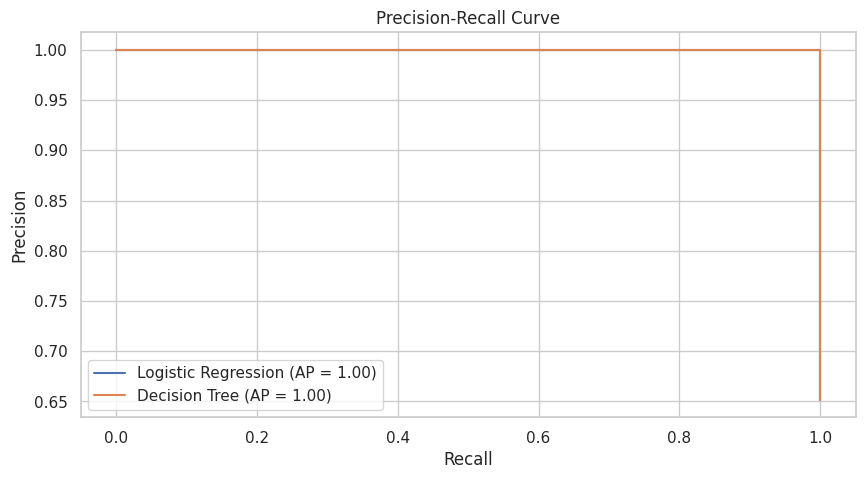

In [47]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcular Precision-Recall Curve para Regresión Logística
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_prob_logreg)
average_precision_logreg = average_precision_score(y_test, y_prob_logreg)

# Calcular Precision-Recall Curve para Árbol de Decisión
precision_tree, recall_tree, _ = precision_recall_curve(y_test, y_prob_tree)
average_precision_tree = average_precision_score(y_test, y_prob_tree)

# Visualizar Precision-Recall Curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(recall_logreg, precision_logreg, label='Logistic Regression (AP = %0.2f)' % average_precision_logreg)
plt.plot(recall_tree, precision_tree, label='Decision Tree (AP = %0.2f)' % average_precision_tree)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Calculadora Interactiva

In [50]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Definir las funciones y modelos predictivos (usando los modelos previamente entrenados)
# Cargar la base de datos desde GitHub para obtener datos de entrenamiento
url = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
data = pd.read_csv(url)

# Calcular IMC (BMI)
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Crear una nueva columna binaria que indique si la persona es candidata a cirugía
def is_candidate(row):
    if 'Obesity' in row:
        return 1
    else:
        return 0

data['Candidate'] = data['NObeyesdad'].apply(is_candidate)

# Selección de características
features = ['Age', 'Gender', 'BMI', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'FAF', 'CALC']
data['Gender'] = data['Gender'].apply(lambda x: 'Male' if x == 'Hombre' else 'Female')

X = data[features]
y = data['Candidate']

# Codificación de variables categóricas
X = pd.get_dummies(X, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC'], drop_first=True)

# Escalado de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamiento del modelo de Regresión Logística
logreg = LogisticRegression(C=100, solver='lbfgs')
logreg.fit(X_scaled, y)

# Entrenamiento del modelo de Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
tree.fit(X, y)

# Crear widgets interactivos para la entrada del usuario
gender_widget = widgets.Dropdown(options=['Male', 'Female'], description='Gender')
age_widget = widgets.IntSlider(min=18, max=100, step=1, description='Age')
height_widget = widgets.FloatSlider(min=1.0, max=2.5, step=0.01, description='Height (m)')
weight_widget = widgets.FloatSlider(min=30, max=300, step=1, description='Weight (kg)')
family_history_widget = widgets.Dropdown(options=['Sí', 'No'], description='Family History of Overweight')
favc_widget = widgets.Dropdown(options=['Sí', 'No'], description='Frequent Consumption of High Caloric Food (FAVC)')
smoke_widget = widgets.Dropdown(options=['Sí', 'No'], description='Smoking Habit')
caec_widget = widgets.Dropdown(options=['Frecuentemente', 'A veces', 'Nunca'], description='Consumption of Food Between Meals (CAEC)')
scc_widget = widgets.Dropdown(options=['Sí', 'No'], description='Calories Consumption Monitoring (SCC)')
faf_widget = widgets.FloatSlider(min=0, max=7, step=0.1, description='Physical Activity Frequency (FAF)')
calc_widget = widgets.Dropdown(options=['A veces', 'No', 'Desconocido'], description='Consumption of Alcohol (CALC)')

# Función para predecir si el individuo es candidato a cirugía bariátrica
def predict_candidate(gender, age, height, weight, family_history, favc, smoke, caec, scc, faf, calc):
    bmi = weight / (height ** 2)

    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'BMI': [bmi],
        'family_history_with_overweight': [family_history],
        'FAVC': [favc],
        'SMOKE': [smoke],
        'CAEC': [caec],
        'SCC': [scc],
        'FAF': [faf],
        'CALC': [calc]
    })

    input_data = pd.get_dummies(input_data, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC'], drop_first=True)

    # Asegurarse de que las columnas de entrada coincidan con las columnas de entrenamiento
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    input_scaled = scaler.transform(input_data)
    prob_logreg = logreg.predict_proba(input_scaled)[0, 1]
    prob_tree = tree.predict_proba(input_data)[0, 1]

    return {
        'Regresión Logística': prob_logreg,
        'Árbol de Decisión': prob_tree,
        'Age': age,
        'BMI': bmi,
        'Candidate': 1 if prob_logreg >= 0.5 else 0
    }

# Función para mostrar el resultado
def show_result(button):
    results = predict_candidate(
        gender_widget.value, age_widget.value, height_widget.value, weight_widget.value,
        family_history_widget.value, favc_widget.value, smoke_widget.value,
        caec_widget.value, scc_widget.value, faf_widget.value, calc_widget.value
    )
    result_logreg.value = f"Regresión Logística: {results['Regresión Logística']:.2f}"
    result_tree.value = f"Árbol de Decisión: {results['Árbol de Decisión']:.2f}"
    plot_result(results)

# Función para graficar el resultado
def plot_result(results):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=[results['Age']],
        y=[results['BMI']],
        mode='markers',
        marker=dict(
            size=15,
            color='blue' if results['Candidate'] == 1 else 'red',
            symbol='circle'
        ),
        name='Candidate'
    ))

    fig.update_layout(
        title='Candidato a Cirugía Bariátrica',
        xaxis_title='Age',
        yaxis_title='BMI',
        showlegend=False
    )

    fig.show()

# Crear widgets para mostrar el resultado
result_logreg = widgets.Label()
result_tree = widgets.Label()
button = widgets.Button(description="Calcular")
button.on_click(show_result)

# Mostrar widgets
display(
    gender_widget, age_widget, height_widget, weight_widget,
    family_history_widget, favc_widget, smoke_widget, caec_widget,
    scc_widget, faf_widget, calc_widget, button, result_logreg, result_tree
)



Dropdown(description='Gender', options=('Male', 'Female'), value='Male')

IntSlider(value=18, description='Age', min=18)

FloatSlider(value=1.0, description='Height (m)', max=2.5, min=1.0, step=0.01)

FloatSlider(value=30.0, description='Weight (kg)', max=300.0, min=30.0, step=1.0)

Dropdown(description='Family History of Overweight', options=('Sí', 'No'), value='Sí')

Dropdown(description='Frequent Consumption of High Caloric Food (FAVC)', options=('Sí', 'No'), value='Sí')

Dropdown(description='Smoking Habit', options=('Sí', 'No'), value='Sí')

Dropdown(description='Consumption of Food Between Meals (CAEC)', options=('Frecuentemente', 'A veces', 'Nunca'…

Dropdown(description='Calories Consumption Monitoring (SCC)', options=('Sí', 'No'), value='Sí')

FloatSlider(value=0.0, description='Physical Activity Frequency (FAF)', max=7.0)

Dropdown(description='Consumption of Alcohol (CALC)', options=('A veces', 'No', 'Desconocido'), value='A veces…

Button(description='Calcular', style=ButtonStyle())

Label(value='')

Label(value='')

In [53]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Definir las funciones y modelos predictivos (usando los modelos previamente entrenados)
# Cargar la base de datos desde GitHub para obtener datos de entrenamiento
url = 'https://raw.githubusercontent.com/luisovillista/Proyecto_Integrador/main/ObesityDataSet(Kaggle)%20-%20Modificado.csv'
data = pd.read_csv(url)

# Calcular IMC (BMI)
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Crear una nueva columna binaria que indique si la persona es candidata a cirugía
def is_candidate(row):
    if 'Obesity' in row:
        return 1
    else:
        return 0

data['Candidate'] = data['NObeyesdad'].apply(is_candidate)

# Selección de características
features = ['Age', 'Gender', 'BMI', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'FAF', 'CALC']
data['Gender'] = data['Gender'].apply(lambda x: 'Male' if x == 'Hombre' else 'Female')

X = data[features]
y = data['Candidate']

# Codificación de variables categóricas
X = pd.get_dummies(X, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC'], drop_first=True)

# Escalado de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamiento del modelo de Regresión Logística
logreg = LogisticRegression(C=100, solver='lbfgs')
logreg.fit(X_scaled, y)

# Entrenamiento del modelo de Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
tree.fit(X, y)

# Crear widgets interactivos para la entrada del usuario
gender_widget = widgets.Dropdown(options=['Male', 'Female'], description='Gender')
age_widget = widgets.IntSlider(min=18, max=100, step=1, description='Age')
height_widget = widgets.FloatSlider(min=1.0, max=2.5, step=0.01, description='Height (m)')
weight_widget = widgets.FloatSlider(min=30, max=300, step=1, description='Weight (kg)')
family_history_widget = widgets.Dropdown(options=['Sí', 'No'], description='Family History of Overweight')
favc_widget = widgets.Dropdown(options=['Sí', 'No'], description='Frequent Consumption of High Caloric Food (FAVC)')
smoke_widget = widgets.Dropdown(options=['Sí', 'No'], description='Smoking Habit')
caec_widget = widgets.Dropdown(options=['Frecuentemente', 'A veces', 'Nunca'], description='Consumption of Food Between Meals (CAEC)')
scc_widget = widgets.Dropdown(options=['Sí', 'No'], description='Calories Consumption Monitoring (SCC)')
faf_widget = widgets.FloatSlider(min=0, max=7, step=0.1, description='Physical Activity Frequency (FAF)')
calc_widget = widgets.Dropdown(options=['A veces', 'No', 'Desconocido'], description='Consumption of Alcohol (CALC)')

# Función para predecir si el individuo es candidato a cirugía bariátrica
def predict_candidate(gender, age, height, weight, family_history, favc, smoke, caec, scc, faf, calc):
    bmi = weight / (height ** 2)

    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'BMI': [bmi],
        'family_history_with_overweight': [family_history],
        'FAVC': [favc],
        'SMOKE': [smoke],
        'CAEC': [caec],
        'SCC': [scc],
        'FAF': [faf],
        'CALC': [calc]
    })

    input_data = pd.get_dummies(input_data, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CAEC', 'SCC', 'CALC'], drop_first=True)

    # Asegurarse de que las columnas de entrada coincidan con las columnas de entrenamiento
    input_data = input_data.reindex(columns=X.columns, fill_value=0)

    input_scaled = scaler.transform(input_data)
    prob_logreg = logreg.predict_proba(input_scaled)[0, 1]
    prob_tree = tree.predict_proba(input_data)[0, 1]

    return {
        'Regresión Logística': prob_logreg,
        'Árbol de Decisión': prob_tree,
        'Age': age,
        'BMI': bmi,
        'Candidate': 1 if prob_logreg >= 0.5 else 0
    }

# Función para mostrar el resultado
def show_result(button):
    results = predict_candidate(
        gender_widget.value, age_widget.value, height_widget.value, weight_widget.value,
        family_history_widget.value, favc_widget.value, smoke_widget.value,
        caec_widget.value, scc_widget.value, faf_widget.value, calc_widget.value
    )
    result_logreg.value = f"Regresión Logística: {results['Regresión Logística']:.2f}"
    result_tree.value = f"Árbol de Decisión: {results['Árbol de Decisión']:.2f}"
    candidate_message.value = "Candidato a Cirugía Bariátrica: Sí" if results['Candidate'] == 1 else "Candidato a Cirugía Bariátrica: No"
    plot_result(results)

# Función para graficar el resultado
def plot_result(results):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=[results['Age']],
        y=[results['BMI']],
        mode='markers',
        marker=dict(
            size=15,
            color='blue' if results['Candidate'] == 1 else 'red',
            symbol='circle'
        ),
        name='Candidate'
    ))

    fig.update_layout(
        title='Candidato a Cirugía Bariátrica',
        xaxis_title='Age',
        yaxis_title='BMI',
        showlegend=False
    )

    fig.show()

# Crear widgets para mostrar el resultado
result_logreg = widgets.Label()
result_tree = widgets.Label()
candidate_message = widgets.Label()
button = widgets.Button(description="Calcular")
button.on_click(show_result)

# Mostrar widgets
display(
    gender_widget, age_widget, height_widget, weight_widget,
    family_history_widget, favc_widget, smoke_widget, caec_widget,
    scc_widget, faf_widget, calc_widget, button, result_logreg, result_tree, candidate_message
)


Dropdown(description='Gender', options=('Male', 'Female'), value='Male')

IntSlider(value=18, description='Age', min=18)

FloatSlider(value=1.0, description='Height (m)', max=2.5, min=1.0, step=0.01)

FloatSlider(value=30.0, description='Weight (kg)', max=300.0, min=30.0, step=1.0)

Dropdown(description='Family History of Overweight', options=('Sí', 'No'), value='Sí')

Dropdown(description='Frequent Consumption of High Caloric Food (FAVC)', options=('Sí', 'No'), value='Sí')

Dropdown(description='Smoking Habit', options=('Sí', 'No'), value='Sí')

Dropdown(description='Consumption of Food Between Meals (CAEC)', options=('Frecuentemente', 'A veces', 'Nunca'…

Dropdown(description='Calories Consumption Monitoring (SCC)', options=('Sí', 'No'), value='Sí')

FloatSlider(value=0.0, description='Physical Activity Frequency (FAF)', max=7.0)

Dropdown(description='Consumption of Alcohol (CALC)', options=('A veces', 'No', 'Desconocido'), value='A veces…

Button(description='Calcular', style=ButtonStyle())

Label(value='')

Label(value='')

Label(value='')

Significados de las Siglas

CAEC: Consumo de alimentos entre comidas (Consumption of food between meals)

SCC: Seguimiento del consumo de calorías (Calories consumption monitoring)

FAF: Frecuencia de actividad física (Physical activity frequency)

CALC: Consumo de alcohol (Consumption of alcohol)